<h1>Carga de datos</h1>

Importo las librerías necesarias para leer los archivos csv.

In [241]:
import pandas as pd

Leo el archivo data_train.

In [242]:
data_train = pd.read_csv("https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_train.csv")

<h1>Análisis exploratorio y limpieza de datos</h1>

In [243]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

El objetivo del trabajo es predecir si los pacientes tendrán estadías largas o cortas en el hospital. Para eso, hay que analizar el historial de pacientes encontrando patrones que determinen el posible tiempo de internación que tendrán. 
Las columnas que interesan son casi todas, excepto "Ward_Facility_Code" ,"patientid" y "Visitors with Patient" que no tienen relevancia alguna a mi parecer. El resto de columnas pueden tener influencia con mayor probabilidad :
"Available Extra Rooms in Hospital": puede ser que haya pocas habitaciones disponibles y por eso las estadías en general sean cortas.
"Department": algunos departamentos de medicina pueden tener casos más complicados clínicamente hablando que conlleven a un tiempo de internación largo. Por ejemplo, radioterapia tendrá más días de internación que un caso de ginecología.
"doctor_name": algunos doctores pueden ser más rigurosos que otros con la atención y dejar más tiempo en observación a sus pacientes.
"staff_available": si falta personal para atender a los pacientes quizás no es recomendable tener estadías muy largas.
"Age": una persona mayor (de la tercera edad) tiene más probabilidades de permanecer más tiempo internado que una persona joven.
"gender": posiblemente pueda observarse alguna tendencia en cuanto al género con el tiempo que la persona está internada.
"Type of Admission": una persona que entra por "emergency" pudo haber tenido un accidente muy grave en el que requiera más tiempo de hospitalización que una persona que ingresa por "trauma".
"Severity of Illness": una persona que ingresa con severidad "extreme" casi seguramente tendrá más tiempo de hospitalización que una con severidad "minor".
"health_conditions": puede empeorar el estado de un paciente internado si tiene patologías previas existentes, por lo que se requeriría más días de internación.
"Insurance": un paciente con seguro de salud podría cubrir más gastos en estudios,medicamentos,etc que una persona que  no cuenta con cobertura.
"Admission_Deposit ": el mismo caso que la columna "Insurance", una persona que realizó un pago con un monto grande puede tener mayor atención que una que haya realizado un pago menor.

Comienzo buscando datos nulos y duplicados.

In [244]:
data_train.isnull().values.any()

False

No hay valores nulos en el dataframe. Ahora busco filas duplicadas:

In [245]:
data_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
409995    False
409996    False
409997    False
409998    False
409999    False
Length: 410000, dtype: bool

No hay filas duplicadas.

In [246]:
data_train[data_train.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


Creo la columna "Stay2" con valores binarios, 1 para estadías largas (más de 8 días) o 0 para estadías cortas(iguales o menores a 8 días).

In [247]:
import numpy as np

In [248]:
data_train["Stay2"] = np.where(data_train["Stay (in days)"]>8,1,0)

data_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay2
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9,1


Elimino la columna "Stay (in days)" porque ya no es necesaria.

In [249]:
data_train = data_train.drop(columns=["Stay (in days)"])

data_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay2
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


Observo datos únicos de las columnas.

In [219]:
len(data_train["patientid"].unique())

122394

In [220]:
data_train["Available Extra Rooms in Hospital"].unique()

array([ 4,  2,  7,  3,  5, 10,  6,  1, 21,  8, 11, 13,  9, 14, 24,  0, 12,
       20])

In [221]:
data_train["Department"].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [222]:
data_train["doctor_name"].unique()

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

In [223]:
data_train["staff_available"].unique()

array([ 0,  2,  8,  7, 10,  5,  9,  3,  6,  4,  1])

In [224]:
data_train["Age"].unique()

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

In [225]:
data_train["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [226]:
data_train["Type of Admission"].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [227]:
data_train["Severity of Illness"].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [228]:
data_train["Insurance"].unique()

array(['Yes', 'No'], dtype=object)

In [229]:
data_train["health_conditions"].unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

Elimino las columnas que no tienen relevancia para el modelo.

In [250]:
data_train = data_train.drop(columns=["Ward_Facility_Code","Visitors with Patient","patientid"])

In [251]:
data_train

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay2
0,4,gynecology,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,0
1,4,gynecology,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,1
2,2,gynecology,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,0
3,4,gynecology,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,4814.149231,0
4,2,anesthesia,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,Dr Sarah,1,31-40,Female,Trauma,Minor,Asthama,Yes,3902.291076,0
409996,5,gynecology,Dr Nathan,5,21-30,Female,Trauma,Extreme,Other,No,4771.995223,1
409997,4,gynecology,Dr Sarah,9,21-30,Female,Emergency,Minor,Asthama,Yes,3816.994210,1
409998,10,gynecology,Dr Olivia,10,21-30,Female,Trauma,Moderate,Other,Yes,3841.577491,1


Veo la relación entre los datos.

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data_train, x=column,hue="Stay2")
    plt.show()

In [234]:
column_category = data_train.select_dtypes(include='object').columns

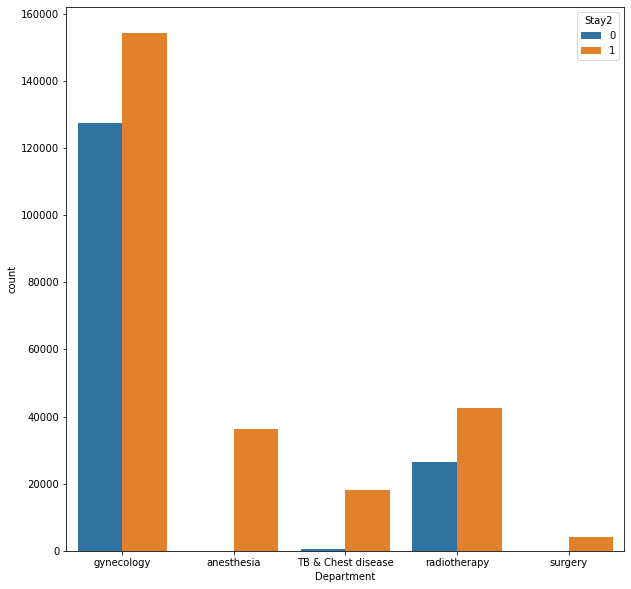

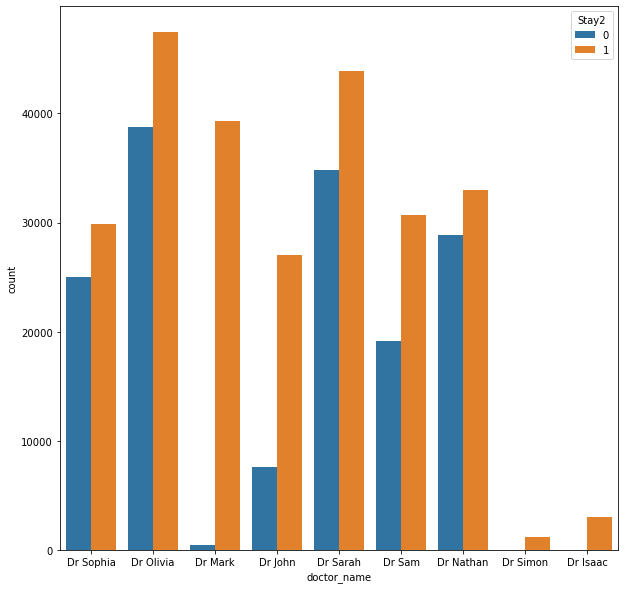

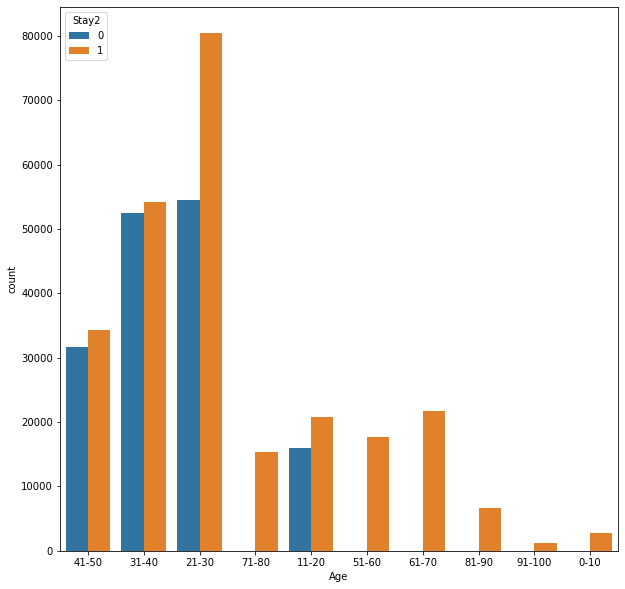

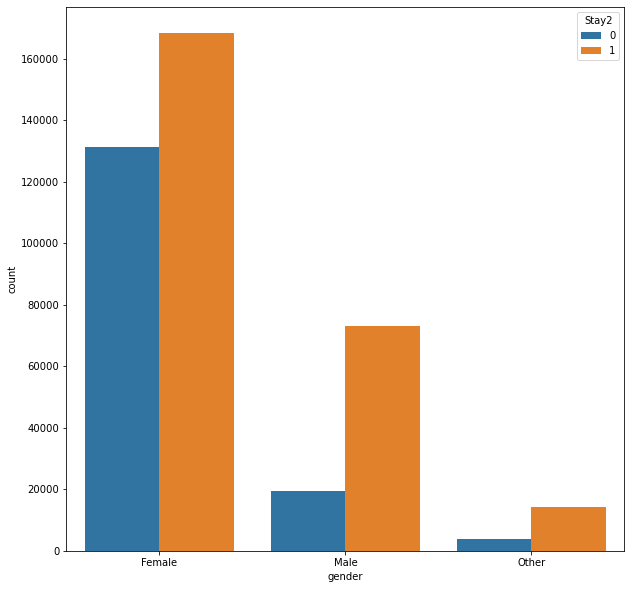

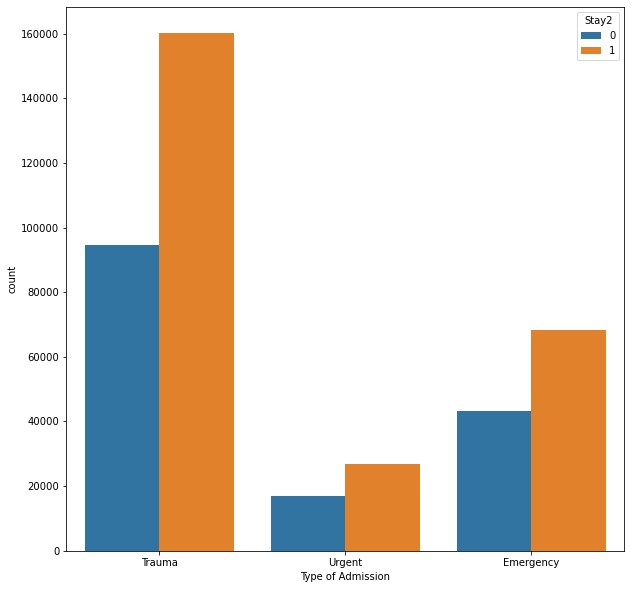

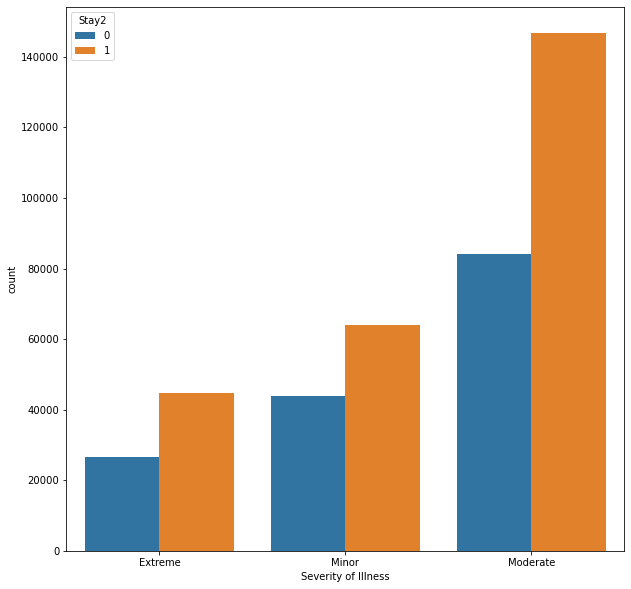

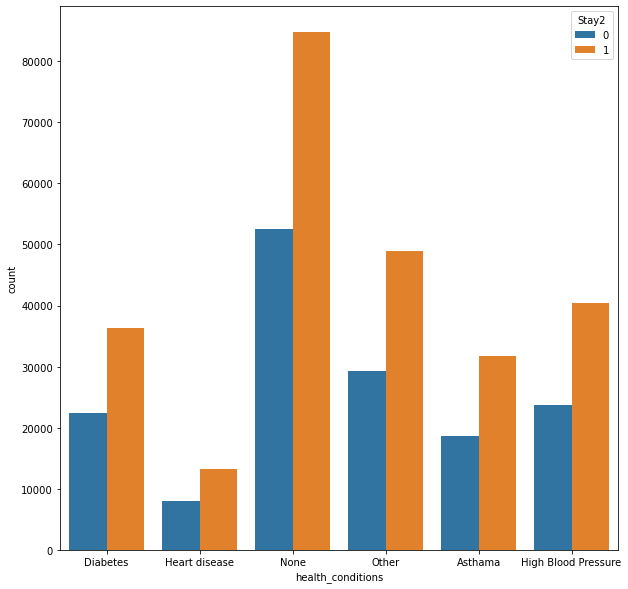

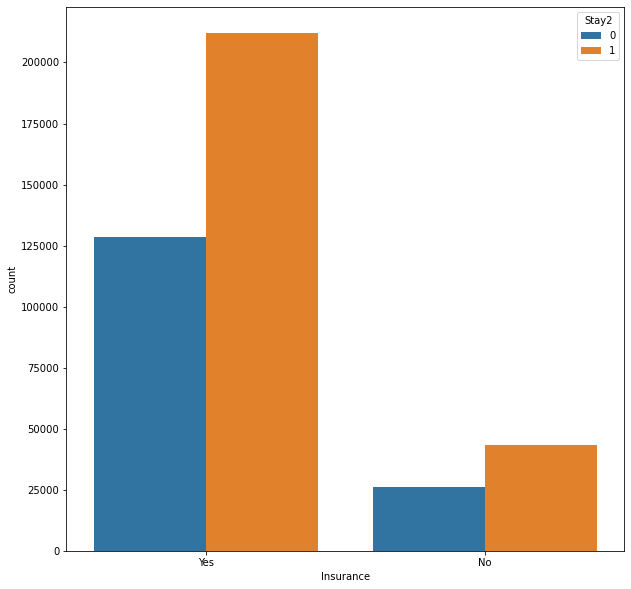

In [235]:
for _ in column_category:
    plot_categorial(_)

Ahora veo la relación con las variables numéricas.

<Figure size 720x720 with 0 Axes>

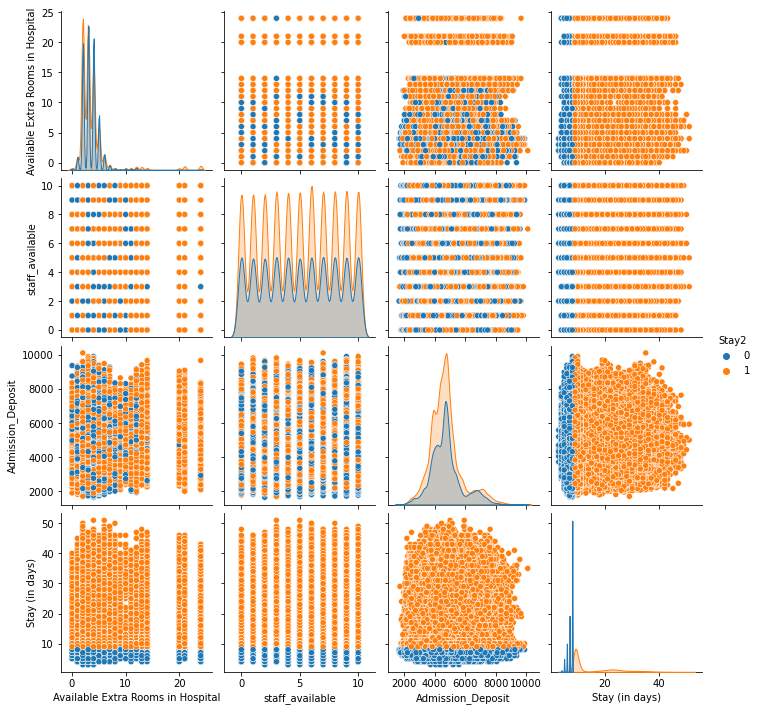

In [236]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= data_train, hue="Stay2")
plt.show()

Uso LabelEncoder para transformar a números las categorías de cada columna que representan variables categóricas.

In [252]:
from sklearn import preprocessing

In [253]:
d = preprocessing.LabelEncoder()
data_train["Department"] = d.fit_transform(data_train["Department"])

data_train["doctor_name"] = d.fit_transform(data_train["doctor_name"])


data_train["Age"] = d.fit_transform(data_train["Age"])


data_train["gender"] = d.fit_transform(data_train["gender"])


data_train["Type of Admission"] = d.fit_transform(data_train["Type of Admission"])


data_train["Severity of Illness"] = d.fit_transform(data_train["Severity of Illness"])


data_train["health_conditions"] = d.fit_transform(data_train["health_conditions"])


data_train["Insurance"] = d.fit_transform(data_train["Insurance"])

In [254]:
data_train

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay2
0,4,2,8,0,4,0,1,0,1,1,2966.408696,0
1,4,2,8,2,3,0,1,1,2,0,3554.835677,1
2,2,2,8,8,2,0,1,0,1,1,5624.733654,0
3,4,2,4,7,3,0,2,2,4,0,4814.149231,0
4,2,1,2,10,7,1,1,2,1,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,6,1,3,0,1,1,0,1,3902.291076,0
409996,5,2,3,5,2,0,1,0,5,0,4771.995223,1
409997,4,2,6,9,2,0,0,1,0,1,3816.994210,1
409998,10,2,4,10,2,0,1,2,5,1,3841.577491,1


In [255]:
print("Número de observaciones por clase(0 o 1)")
print(data_train["Stay2"].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * data_train["Stay2"].value_counts(normalize=True))

Número de observaciones por clase(0 o 1)
1    255416
0    154584
Name: Stay2, dtype: int64

Porcentaje de observaciones por clase
1    62.296585
0    37.703415
Name: Stay2, dtype: float64


<h1>Creación del modelo</h1>

Importo lo necesario para crear el modelo de regresión logística y para ignorar warnings.

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [257]:
import warnings
warnings.filterwarnings("ignore")

In [258]:
X = np.array(data_train.drop(["Stay2"],1))
Y = np.array(data_train["Stay2"])
X.shape

(410000, 11)

Se puede ver que quedaron 11 variables independientes (X).

Separo los datos en train y test.

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h1>Escalabilidad de los datos</h1>

Importo las métricas que se utilizarán : accuracy y recall, que provienen de la matriz de confusión.
Y estandarizo los datos con StandardScaler.

In [260]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score

In [261]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Creo el modelo de regresión logística.

In [262]:
algoritmo = LogisticRegression()

Entreno el modelo con los datos de train.

In [263]:
algoritmo.fit(X_train, Y_train)

LogisticRegression()

In [264]:
Y_Pred = algoritmo.predict(X_train)

<h1>Métricas</h1>

In [265]:
matriz = confusion_matrix(Y_train, Y_Pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 27170  96403]
 [ 35034 169393]]


In [266]:
print('La exactitud del modelo es:', accuracy_score(Y_train, Y_Pred))

La exactitud del modelo es: 0.5992774390243902


In [267]:
recall = recall_score(Y_train, Y_Pred)
print('Recall del modelo es:')
print(recall)

Recall del modelo es:
0.8286234205853434


In [268]:
precision = precision_score(Y_train, Y_Pred)
print('La precision del modelo es:')
print(precision)

La precision del modelo es:
0.6373045493536397


In [269]:
f1 = f1_score(Y_train, Y_Pred)
print('f1 del modelo es:')
print(f1)

f1 del modelo es:
0.720479432099238


In [270]:
y_pred = algoritmo.predict(X_test)

In [271]:
matriz = confusion_matrix(Y_test, y_pred)
print('Matriz de Confusión:')
print("   0 ,    1")
print(matriz)

Matriz de Confusión:
   0 ,    1
[[ 6803 24208]
 [ 8639 42350]]


In [272]:
print('La exactitud del modelo es:', accuracy_score(Y_test, y_pred))

La exactitud del modelo es: 0.5994268292682927


In [273]:
recall = recall_score(Y_test, y_pred)
print('Recall del modelo es:')
print(recall)

Recall del modelo es:
0.8305712996920904


Incorporo el nuevo archivo csv para predecir si las estadías serán largas o cortas.

In [274]:
data_test = pd.read_csv("https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_test.csv")

In [275]:
data_test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [276]:
data_test = data_test.drop(columns=["Ward_Facility_Code","Visitors with Patient","patientid"])

In [277]:
d = preprocessing.LabelEncoder()
data_test["Department"] = d.fit_transform(data_test["Department"])


data_test["doctor_name"] = d.fit_transform(data_test["doctor_name"])


data_test["Age"] = d.fit_transform(data_test["Age"])


data_test["gender"] = d.fit_transform(data_test["gender"])


data_test["Type of Admission"] = d.fit_transform(data_test["Type of Admission"])


data_test["Severity of Illness"] = d.fit_transform(data_test["Severity of Illness"])


data_test["health_conditions"] = d.fit_transform(data_test["health_conditions"])


data_test["Insurance"] = d.fit_transform(data_test["Insurance"])

In [278]:
data_test

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit
0,3,2,4,10,2,0,1,2,5,0,4749.640225
1,2,0,1,4,5,0,1,2,0,1,4122.261324
2,2,3,1,7,5,2,1,2,4,0,5459.067882
3,2,2,4,1,2,0,1,2,4,1,3987.033318
4,2,1,1,7,5,0,1,0,1,0,4770.789695
...,...,...,...,...,...,...,...,...,...,...,...
89995,4,2,6,2,1,0,1,1,3,0,4105.795901
89996,13,2,4,8,3,0,0,2,5,0,4631.550257
89997,2,2,6,3,1,0,0,2,3,0,5456.930075
89998,2,3,1,1,6,0,1,0,1,0,4694.127772


In [279]:
X1 = np.array(data_test)
X1.shape

(90000, 11)

In [280]:
X1 = escalar.fit_transform(X1)

In [281]:
data_test

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit
0,3,2,4,10,2,0,1,2,5,0,4749.640225
1,2,0,1,4,5,0,1,2,0,1,4122.261324
2,2,3,1,7,5,2,1,2,4,0,5459.067882
3,2,2,4,1,2,0,1,2,4,1,3987.033318
4,2,1,1,7,5,0,1,0,1,0,4770.789695
...,...,...,...,...,...,...,...,...,...,...,...
89995,4,2,6,2,1,0,1,1,3,0,4105.795901
89996,13,2,4,8,3,0,0,2,5,0,4631.550257
89997,2,2,6,3,1,0,0,2,3,0,5456.930075
89998,2,3,1,1,6,0,1,0,1,0,4694.127772


In [282]:
y_pred1 = algoritmo.predict(X1)
y_pred1

array([1, 1, 1, ..., 0, 1, 1])

In [283]:
numeros_unicos = list(set(y_pred1))
print(numeros_unicos)

[0, 1]


In [284]:
len(y_pred1)

90000

In [285]:
data_test["pred"] = y_pred1

In [286]:
data_test

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,pred
0,3,2,4,10,2,0,1,2,5,0,4749.640225,1
1,2,0,1,4,5,0,1,2,0,1,4122.261324,1
2,2,3,1,7,5,2,1,2,4,0,5459.067882,1
3,2,2,4,1,2,0,1,2,4,1,3987.033318,1
4,2,1,1,7,5,0,1,0,1,0,4770.789695,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,2,6,2,1,0,1,1,3,0,4105.795901,0
89996,13,2,4,8,3,0,0,2,5,0,4631.550257,1
89997,2,2,6,3,1,0,0,2,3,0,5456.930075,0
89998,2,3,1,1,6,0,1,0,1,0,4694.127772,1


Creo el archivo csv con las predicciones.

In [287]:
data_test["pred"].to_csv("DCarolinaSosa.csv",index = False)